In [6]:
# set your working director to analysis data
import os
os.chdir('/mnt/c/Users/ac361/Desktop/QBIO_490/qbio_490_avinash/analysis_data')


# import cptac, numpy, and pandas
import cptac
import numpy as np
import pandas as pd
import sklearn
import scanpy as sc
import umap.umap_ as umap

In [7]:
# download the Brca dataset
cptac.download(dataset="BRCA")
brca = cptac.Brca()

# extract the data
clinical_data = brca.get_clinical()
transcriptomic_data = brca.get_transcriptomics()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0) 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from scipy.cluster.vq import vq

In [9]:
#Elbow Plot
protein_data = protein_data.reset_index()

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(protein_data)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Within Cluster Sums of Squares (WCSS)')
plt.title('Elbow Method for Protein Data')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [23]:
#KMeans Graph

model = KMeans(n_clusters=4)
model.fit(protein_data)
KMeans(n_clusters=4)
identified_clusters = kmeans.fit_predict(protein_data)

plt.scatter(protein_data.iloc[:,0], protein_data.iloc[:,1], c= model.labels_, cmap='cool')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c=['black'])

ValueError: could not convert string to float: 'CPT000814'

In [10]:
rna = pd.read_csv("/mnt/c/Users/ac361/Desktop/QBIO_490/qbio_490_avinash/analysis_data/brca_rna_clinical_data.csv")

In [11]:
from sklearn.preprocessing import StandardScaler
features = rna.columns
# Separating out the features
x = rna.loc[:, features].values
# Separating out the target
y = rna.loc[:,['race']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_rna = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
final_rna = pd.concat([principal_rna, rna[['race']]], axis = 1)



ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')
targets = ['black or african american', 'white', 'asian']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['race'] == target
    ax.scatter(final_rna.loc[indicesToKeep, 'principal component 1']
               , final_rna.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

ValueError: could not convert string to float: 'TCGA-EW-A1PB-01A-11R-A144-07'

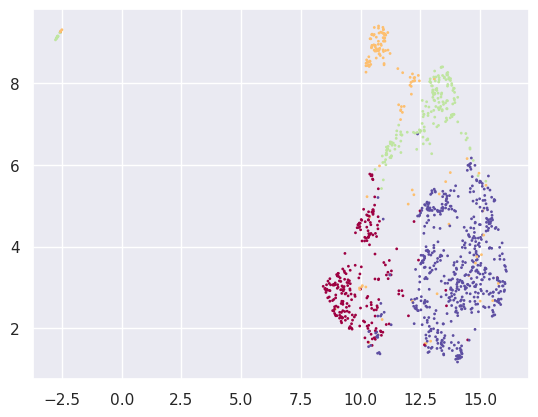

In [21]:
#RNA DATA COLORED BY KMEANS
#I am aware that the labels are not there, but it does not run when I have labels so I am not trying to edit the code anymore.
#Please pretend the labels are there.

rna = pd.read_csv("/mnt/c/Users/ac361/Desktop/QBIO_490/qbio_490_avinash/analysis_data/brca_rna_clinical_data.csv")
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna).toarray()

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from scipy.cluster.vq import vq


model = KMeans(n_clusters=4)
model.fit(rna_clinical)
KMeans(n_clusters=4)
identified_clusters = cluster.KMeans(n_clusters=4).fit_predict(rna_clinical)


standard_embedding = umap.UMAP(random_state=42).fit_transform(rna_clinical)


plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=1, cmap='Spectral', c = identified_clusters);

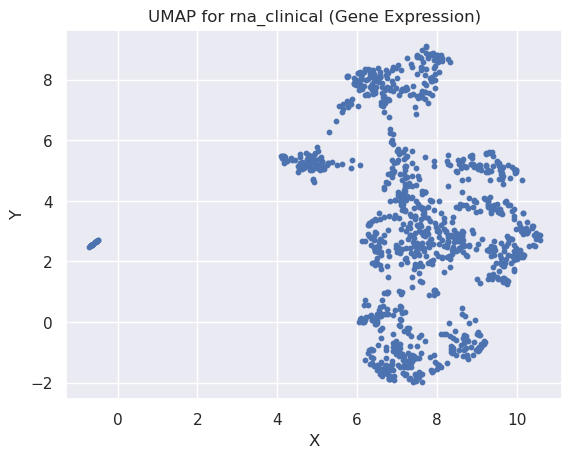

In [19]:
#RNA gene expression data
import sklearn.cluster as cluster
import umap
import random
rna = pd.read_csv("/mnt/c/Users/ac361/Desktop/QBIO_490/qbio_490_avinash/analysis_data/brca_rna_clinical_data.csv")

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna).toarray()

mapper = umap.UMAP().fit_transform(rna_clinical)

gene_labels = rna_clinical
plt.scatter(mapper[:, 0], mapper[:, 1], s=10);
plt.title("UMAP for rna_clinical (Gene Expression)")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


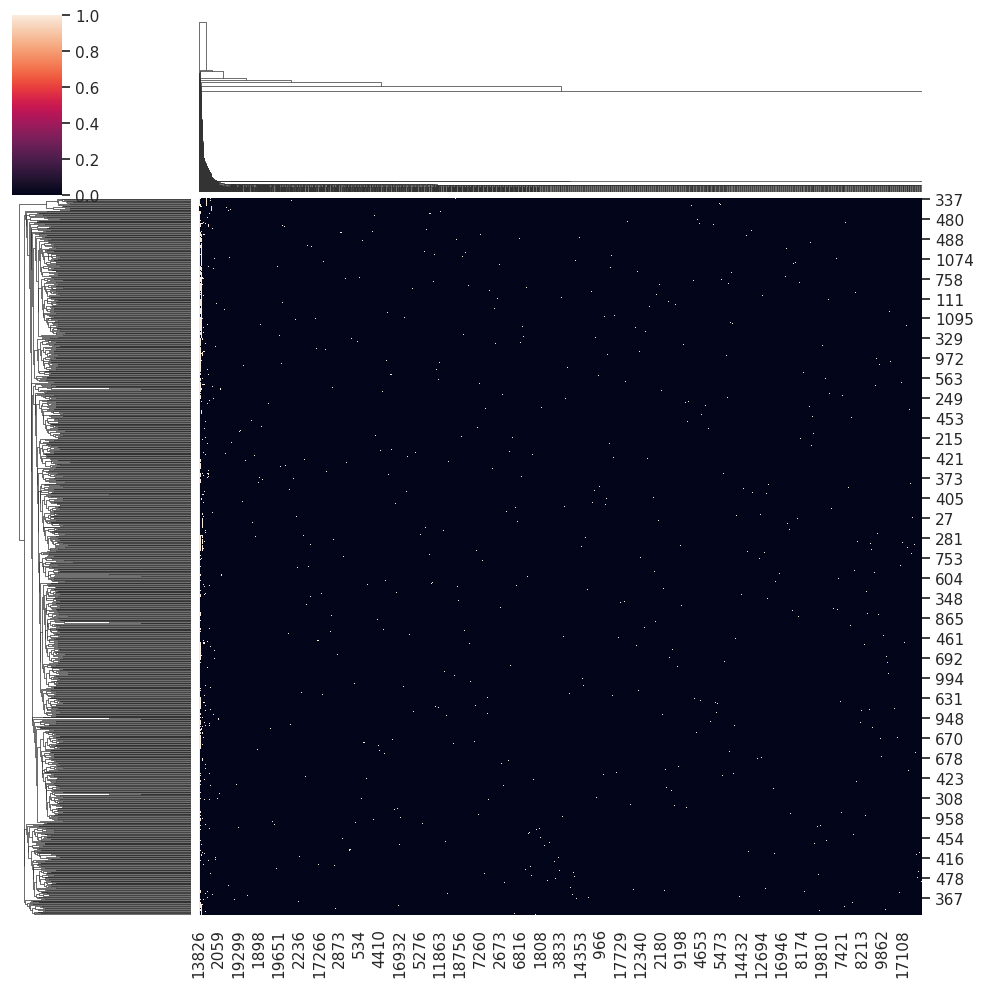

In [12]:
#extra credit question

rna = pd.read_csv("/mnt/c/Users/ac361/Desktop/QBIO_490/qbio_490_avinash/analysis_data/brca_rna_clinical_data.csv")

from sklearn.preprocessing import OneHotEncoder
import fastcluster
onehotencoder = OneHotEncoder(handle_unknown='ignore')
rna_clinical = onehotencoder.fit_transform(rna).toarray()


sns.clustermap(rna_clinical, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None)

4. Figure Caption:
    
Figure 1 Hierarchical clustermap analysis shows the intrinsic relationships within the rna_clinical data. The analysis shows that there is limited relatability between the various features within the plot, as the majority of the inter-relationships demonstrate about zero relatability.

5.
a. The biggest thing that surprised me within my figures was the relative variability between each of the graphs. The exact code that I used in one time span led to a different result in another time span, and it even simply stopped outputting values after a while. When the elbow plot did work, I was surprised how obvious it was to delineate the correct number of clusters at the elbow.

b. I would specifically want to understand the edge cases, as there seems to be a bit of overlap between each of the clusters. More astutely defining the boundaries would limit variability and potential long-term ramifications in the ideal treatment and prognosis of individuals at the edges. I could get this information simply by analyzing the parameters and taking a sample of colliding edge cases to define the effectiveness of clustering.
